In [159]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from imblearn.over_sampling import SMOTE

df = pd.read_csv('shopping_reviews_with_emotions_cleaned.csv')
df.head()

,review,emotion_label
0,Nice soft tee for my husband for Father's Day....,0
1,The shirt arrived rather quickly after orderin...,4
2,I have purchased 3 tshirts from Teepublic and ...,1
3,Our order was perfect. Thank you,0
4,This was my first purchase with tee public and...,1


In [160]:
df['emotion_label'].value_counts()

emotion_label
7    11885
0     6539
1     2050
3     1953
6      887
4      397
5       59
Name: count, dtype: int64

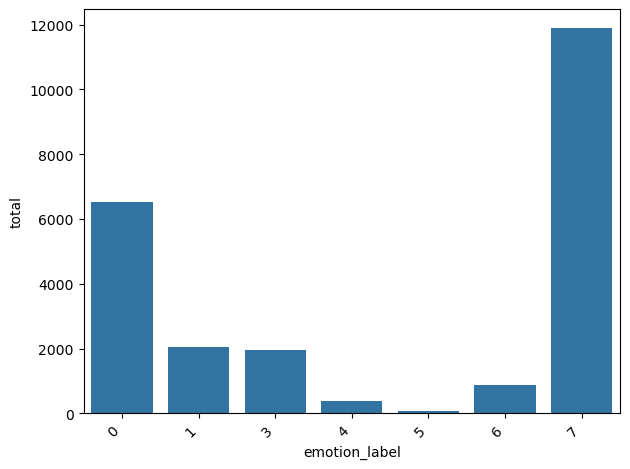

In [161]:
import seaborn as sns

df['total'] = df.groupby('emotion_label')['emotion_label'].transform('count')
sns.barplot(data=df, x='emotion_label', y='total')
# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align right
# Display the plot
plt.tight_layout() # Improves label fitting
plt.show()

Training The Model
1. Text Processing
- Tokenization
- Lowercasing
- Removing Punctuation
- Stopwords Removal (optional)
2. Feature Extraction
- TF-IDF
- SMOTE for balancing imbalance data
3. Model Training
- Decision Tree


Cleaning the Data

In [162]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [wnl.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gamin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gamin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [163]:
df['review_cleaned'] = df['review'].apply(clean_text)
data_final = df[['review_cleaned','emotion_label']]
data_final

,review_cleaned,emotion_label
0,nice soft tee husband father daybright attract...,0
1,shirt arrived rather quickly ordering however ...,4
2,purchased tshirts teepublic extremely happy pu...,1
3,order perfect thank,0
4,first purchase tee public im happy rainbow bri...,1
...,...,...
23765,ordered shirt granddaughtershe play annieand s...,7
23766,shirt wasas describedcommunication purchase de...,7
23767,quick ship great price wasnt first order,7
23768,shirt arrived time seems smidge larger expecte...,7


Model Training

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

vectorizer = TfidfVectorizer(stop_words = 'english')
review_x = vectorizer.fit_transform(data_final['review_cleaned'])
label_y = data_final['emotion_label']

X_train, X_test, y_train, y_test = train_test_split(review_x,label_y, test_size = 0.3, random_state= 42)
#--------------apply DecisionTreeClassifier-----------
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
#--------------predict the data-----------------------
y_pred = tree.predict(X_test)
#-------------Accuracy Score of the dataset-----------------------
print('Classification Report:')
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1938
           1       0.73      0.77      0.75       569
           3       0.83      0.77      0.80       619
           4       0.26      0.20      0.23       128
           5       0.50      0.41      0.45        17
           6       0.36      0.32      0.34       251
           7       0.80      0.86      0.83      3609

    accuracy                           0.80      7131
   macro avg       0.63      0.59      0.61      7131
weighted avg       0.80      0.80      0.80      7131



In [ ]:
#-------------sample prediction-----------------------
def prediction_model(text):
    emotion_labels = {
    0: "gratitude",
    1: "joy",
    2: "satisfaction",
    3: "disappointment",
    4: "disapproval",
    5: "annoyance",
    6: "approval",
    7: "neutral"
    }   
    cleand_text = clean_text(text)
    vc_cleaned = vectorizer.transform([cleand_text])
    y_prediction_real = tree.predict(vc_cleaned)
    return emotion_labels[y_prediction_real[0]]

Inputted_string = "This was my first purchase, the shipping was on time and fast and the quality of the item are amazing. Thank you"
pred = prediction_model(Inputted_string)
print(f'Input String: {Inputted_string}')
print(f"Prediction: {pred}")

Input String: This was my first purchase, the shipping was on time and fast and the quality of the item are amazing. Thank you
Prediction: gratitude
